# Exploratory Data Analysis

[link dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(os.path.join('data', 'alzheimers_disease_data.csv'))
df = df.drop(columns=['PatientID', 'DoctorInCharge'])
# df.columns[0]

In [23]:
df.to_csv('data.csv', index=False)

In [3]:
# check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [4]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [5]:
df.duplicated().sum()

0

There are many feature that we have analyzed and to make the analysis easier,  i assume data with unique values < 10 will be categorical_feature and others are numerical_feature

In [6]:
# categorical = []
# numerical = []
# for i in df.columns:
#     if len(df[i].unique()) < 10:
#         categorical.append(i)
#     else:
#         numerical.append(i)
        
# with list comprehension
categorical = [column for column in df.columns if len(df[column].unique()) < 10]
numerical = [column for column in df.columns if len(df[column].unique()) >= 10]

In [7]:
for i in categorical:
    print(f'{i} : {len(df[i].unique())}')

Gender : 2
Ethnicity : 4
EducationLevel : 4
Smoking : 2
FamilyHistoryAlzheimers : 2
CardiovascularDisease : 2
Diabetes : 2
Depression : 2
HeadInjury : 2
Hypertension : 2
MemoryComplaints : 2
BehavioralProblems : 2
Confusion : 2
Disorientation : 2
PersonalityChanges : 2
DifficultyCompletingTasks : 2
Forgetfulness : 2
Diagnosis : 2


In [8]:
for i in numerical:
    print(f'{i} : {len(df[i].unique())}')

Age : 31
BMI : 2149
AlcoholConsumption : 2149
PhysicalActivity : 2149
DietQuality : 2149
SleepQuality : 2149
SystolicBP : 90
DiastolicBP : 60
CholesterolTotal : 2149
CholesterolLDL : 2149
CholesterolHDL : 2149
CholesterolTriglycerides : 2149
MMSE : 2149
FunctionalAssessment : 2149
ADL : 2149


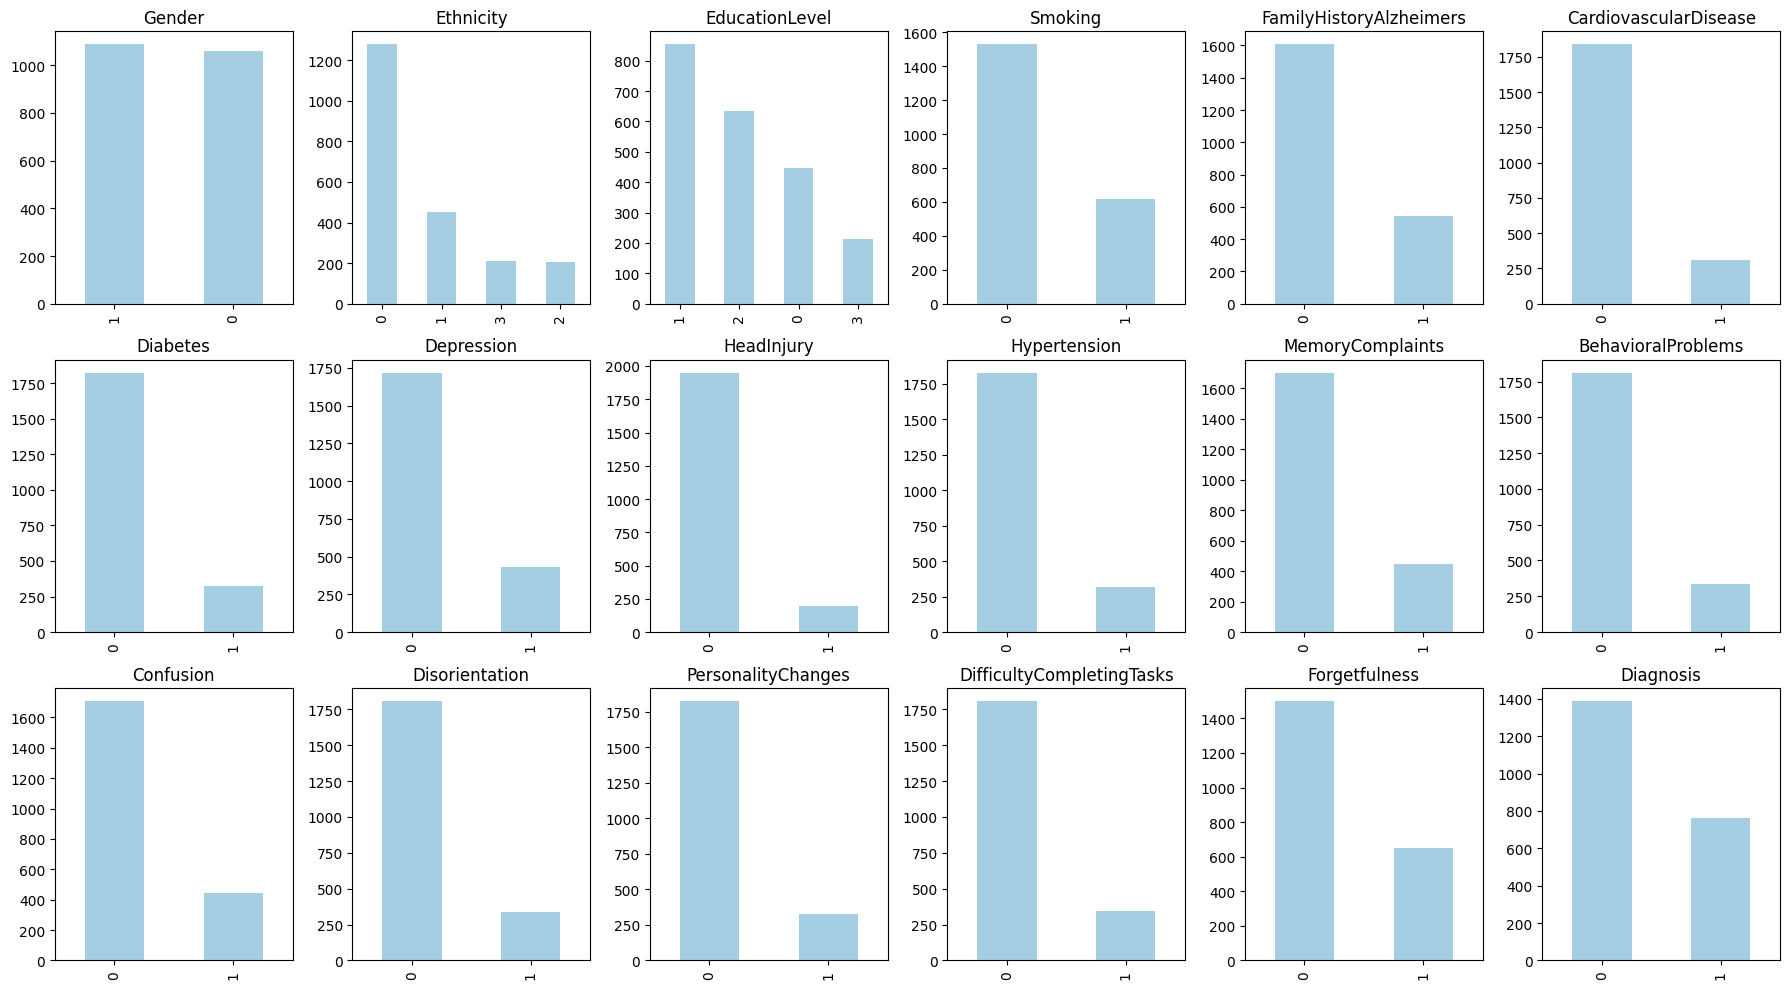

In [9]:
fig, axes = plt.subplots(3, 6, figsize=(18, 10))

for i, feature in enumerate(categorical):
  r = i // 6
  c = i % 6
  count = df[feature].value_counts()

  count.plot(kind='bar', ax=axes[r, c], cmap='Paired')
  axes[r,c].set_title(f'{feature}')

plt.tight_layout()
plt.show()

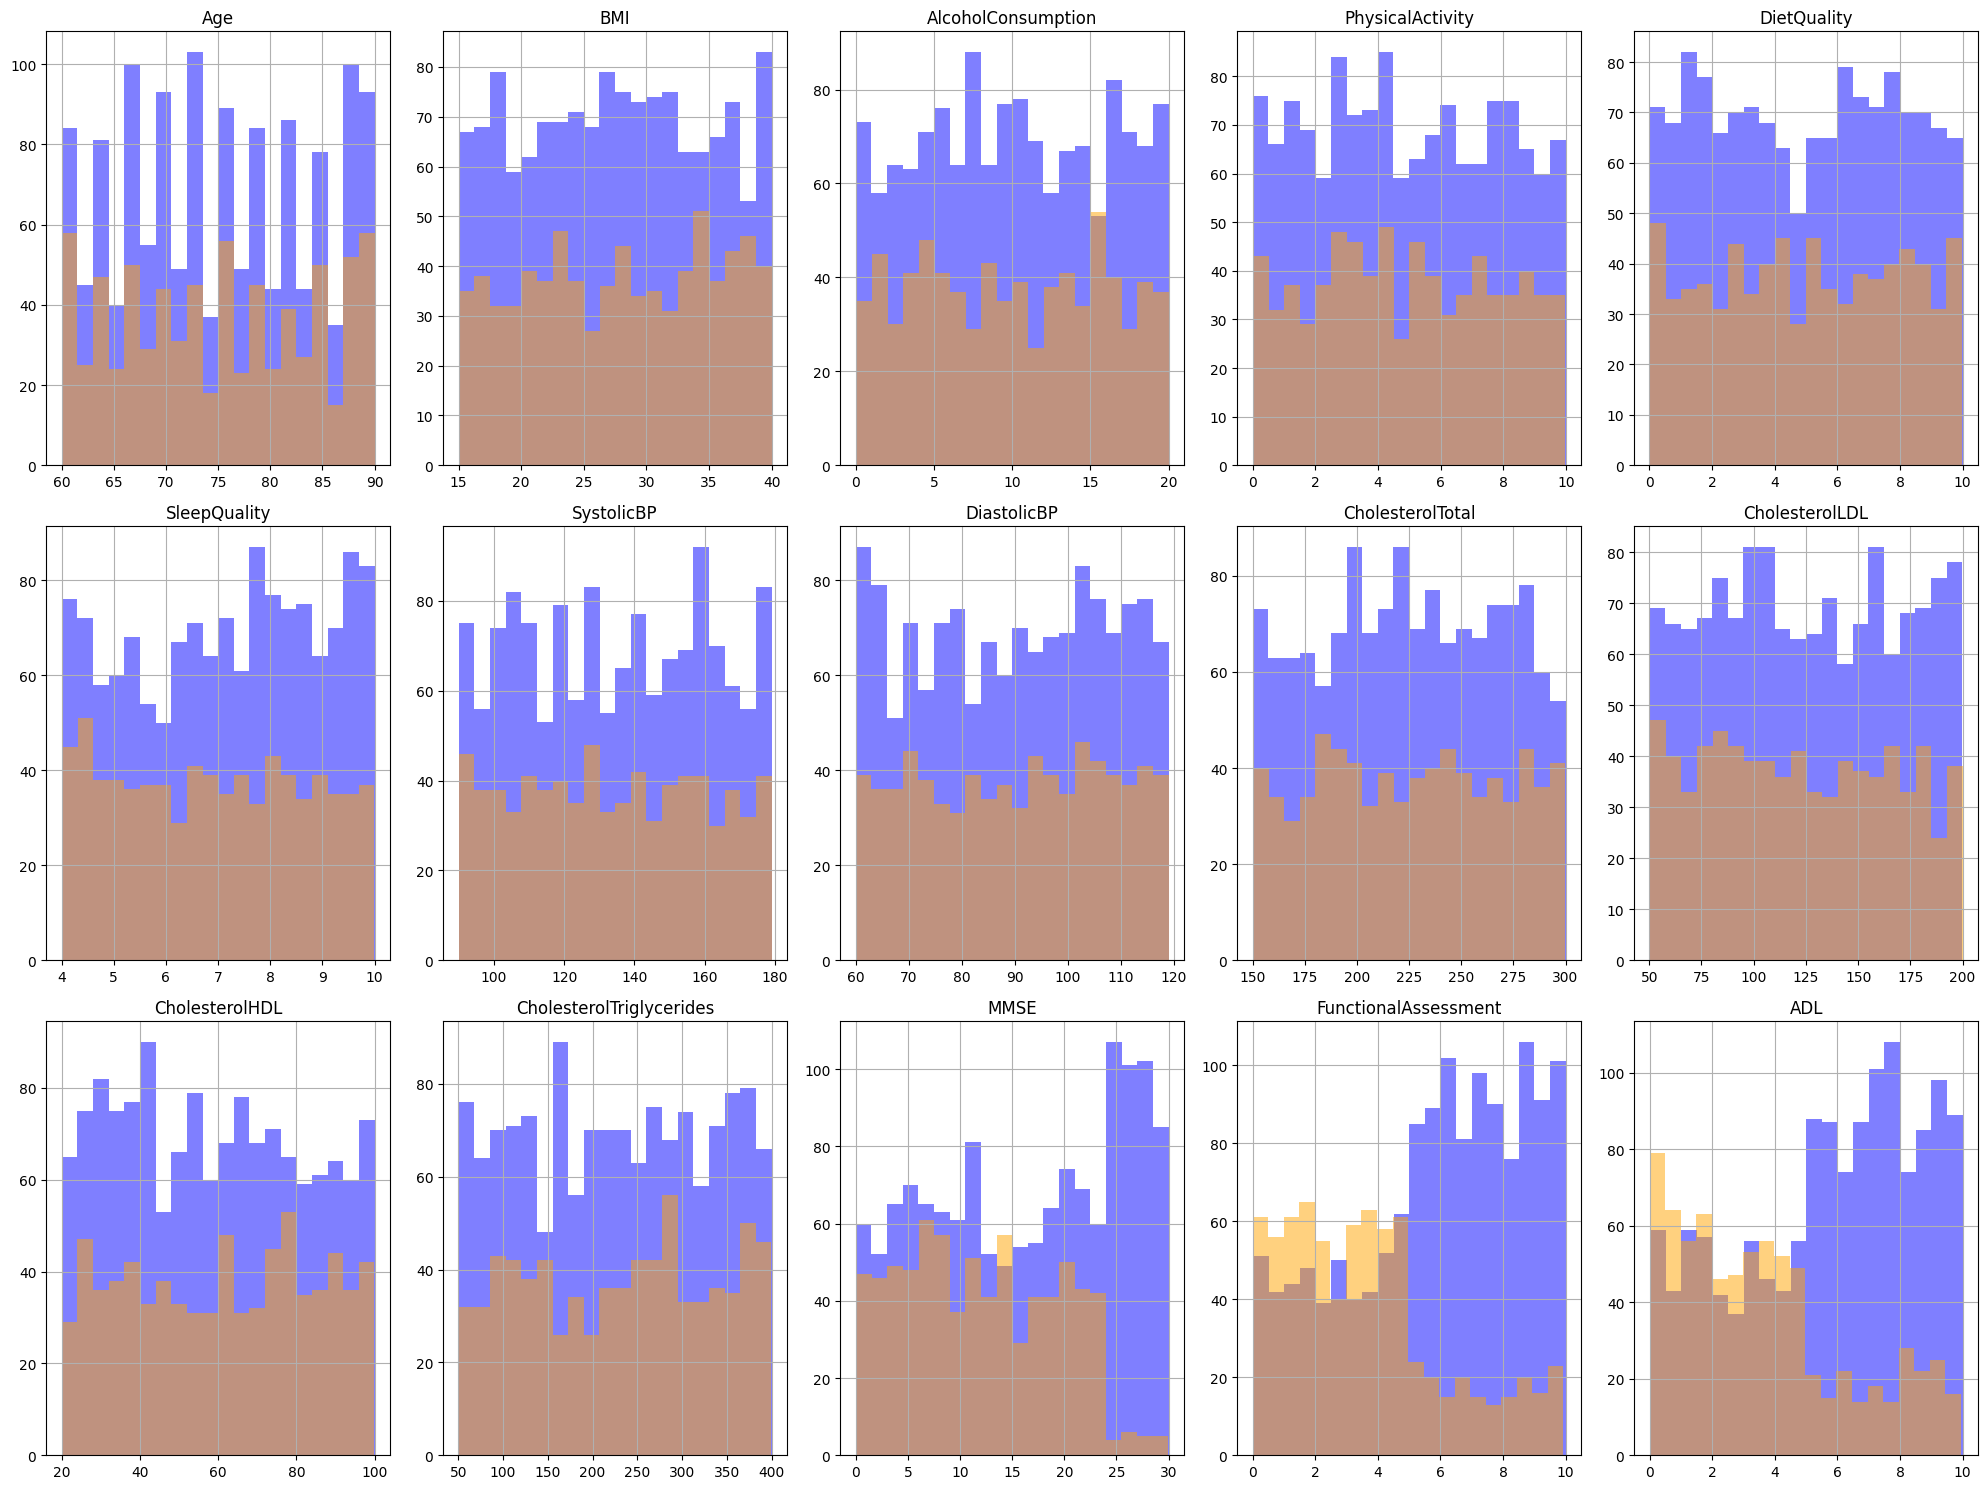

In [10]:
fig, ax = plt.subplots(3, 5, figsize=(20, 15))
df[df.Diagnosis == 0][numerical].hist(bins=20,
                                color='blue',
                                alpha=0.5,
                                ax=ax)
df[df.Diagnosis == 1][numerical].hist(bins=20,
                                color='orange',
                                alpha=0.5,
                                ax=ax)

plt.tight_layout()
plt.show()

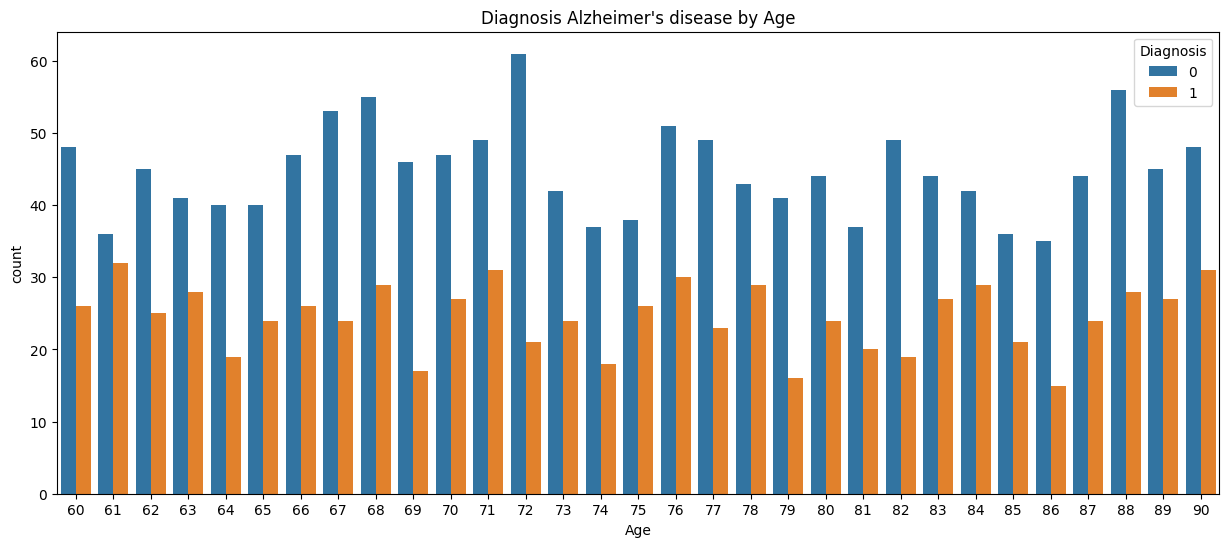

In [11]:
age = df.groupby(['Age', 'Diagnosis']).size().reset_index(name='count')

fig = plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='count', hue='Diagnosis',data=age)
plt.title('Diagnosis Alzheimer\'s disease by Age')
plt.show()

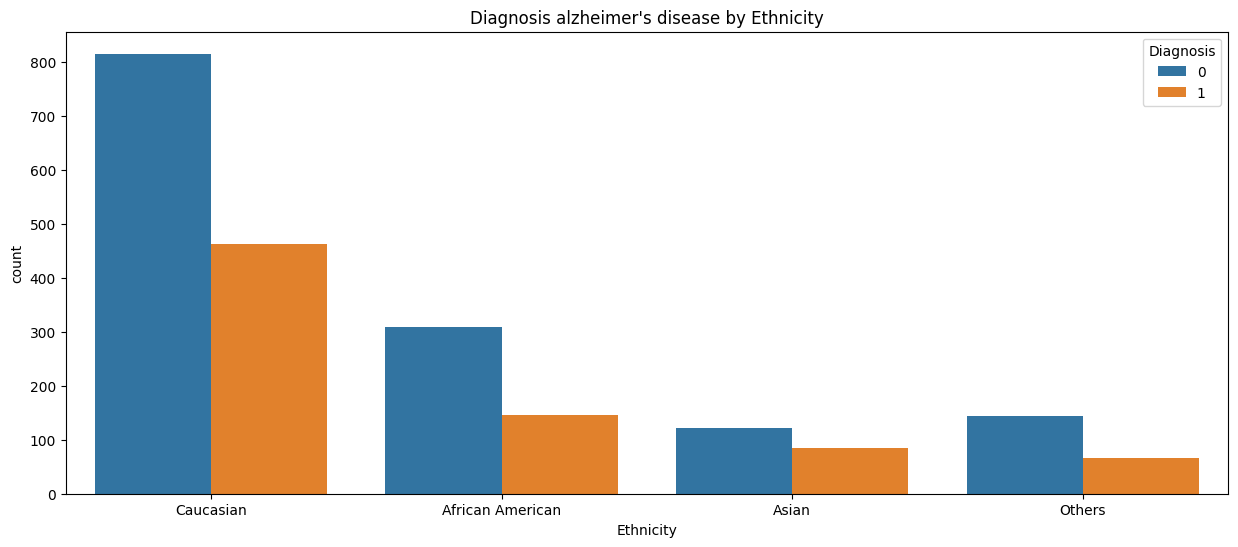

In [12]:
etnicity = df.groupby(['Ethnicity', 'Diagnosis']).size().reset_index(name='count')
etnicity.Ethnicity = etnicity.Ethnicity.replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Others'})

fig = plt.figure(figsize=(15, 6))
sns.barplot(x='Ethnicity', y='count', hue='Diagnosis',data=etnicity)
plt.title('Diagnosis alzheimer\'s disease by Ethnicity')
plt.show()

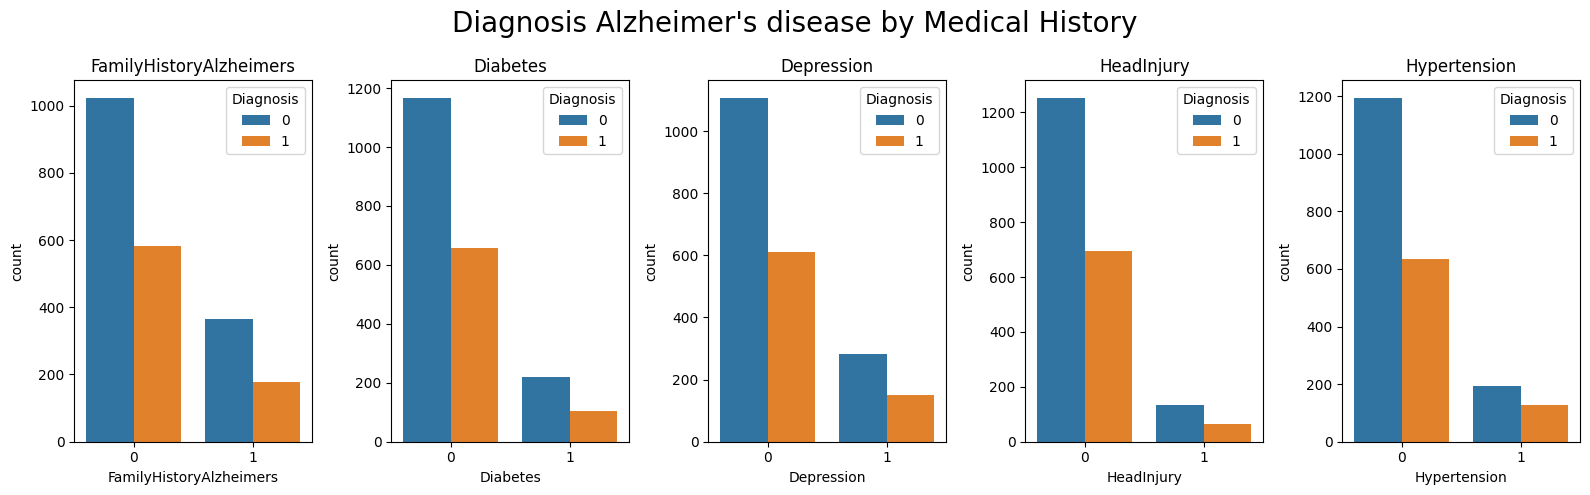

In [13]:
medical_history = df[['FamilyHistoryAlzheimers', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']]

fig, ax = plt.subplots(1,5, figsize=(16, 5))
for i, feature in enumerate(medical_history.columns):
    c = i % 5
    a = df.groupby([feature, 'Diagnosis']).size().reset_index(name='count')
    sns.barplot(x=feature, y='count', hue='Diagnosis', data=a, ax=ax[c])
    ax[c].set_title(f'{feature}')
    
plt.suptitle('Diagnosis Alzheimer\'s disease by Medical History', fontsize=20)
plt.tight_layout()
plt.show()
    

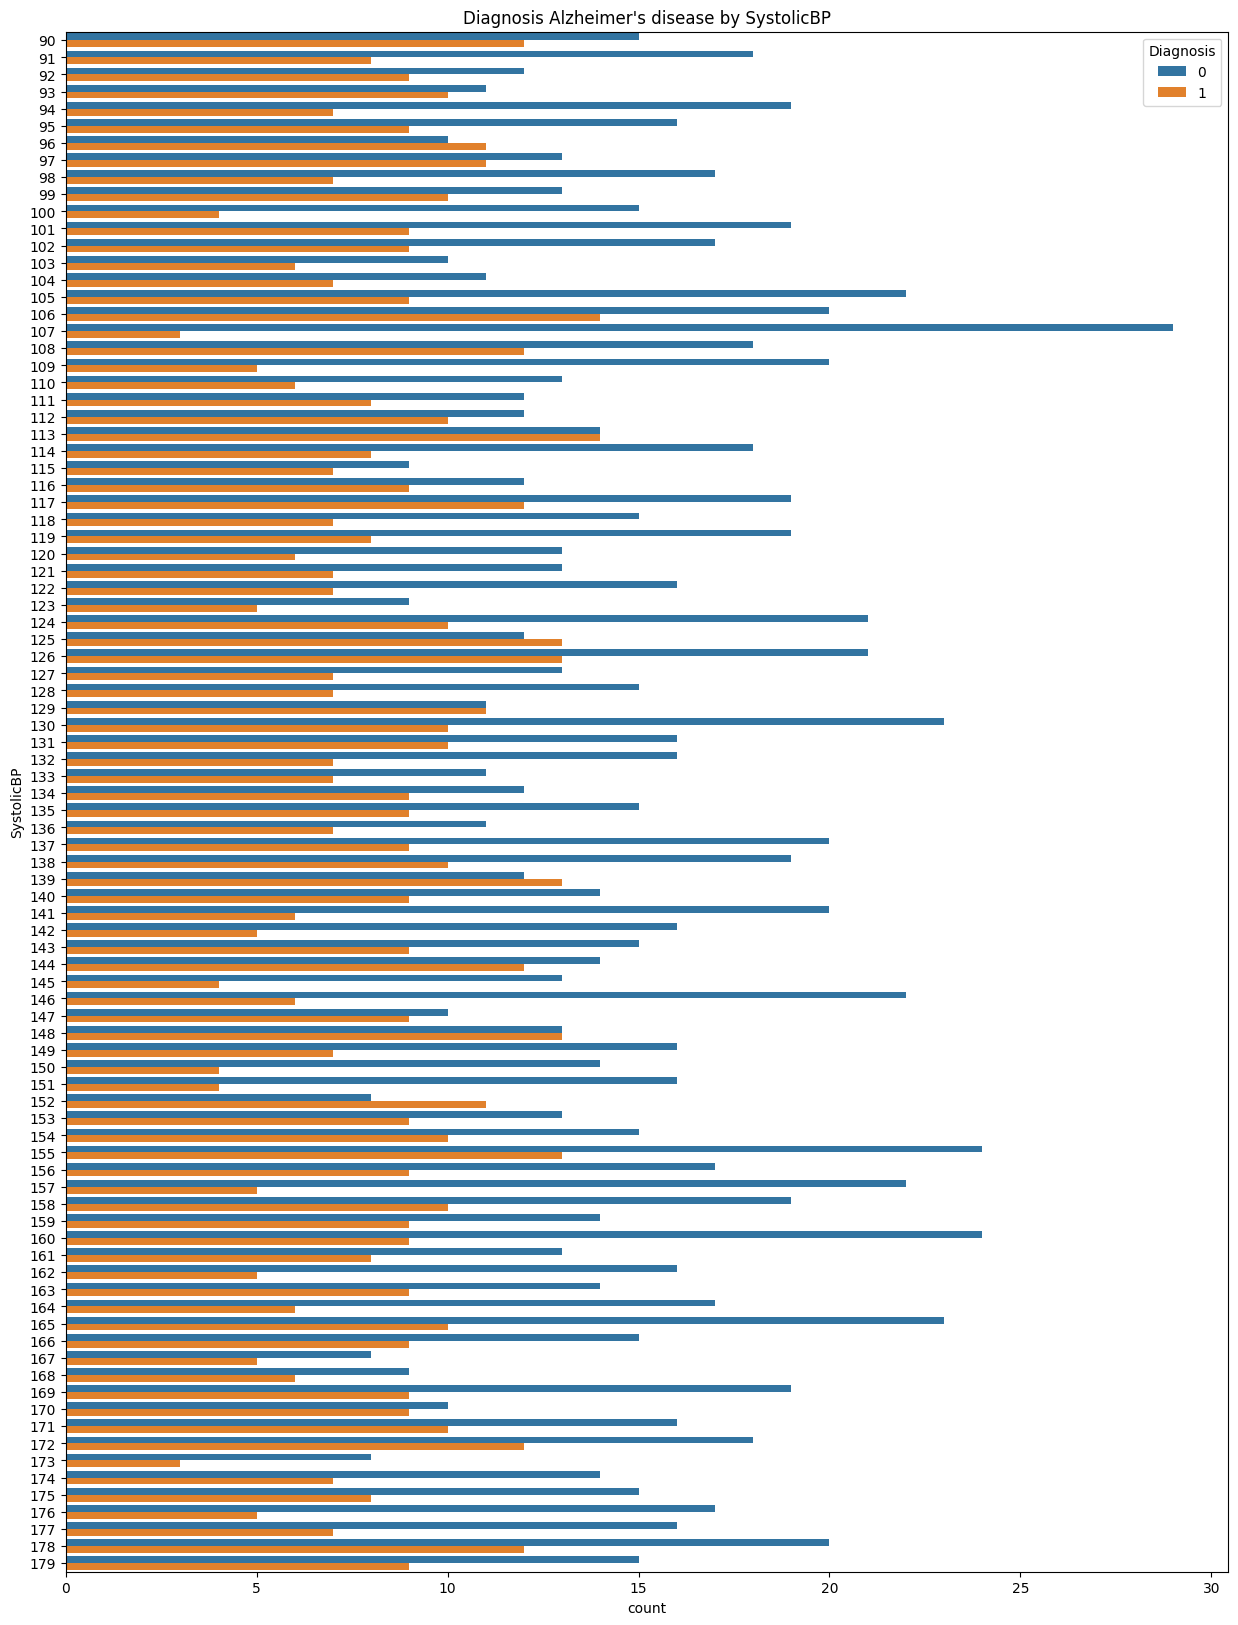

In [14]:
systolic = df.groupby(['SystolicBP', 'Diagnosis']).size().reset_index(name='count')

fig = plt.figure(figsize=(15, 20))
sns.barplot(x='count', y='SystolicBP', hue='Diagnosis',data=systolic, orient='h')
plt.title('Diagnosis Alzheimer\'s disease by SystolicBP')
plt.show()

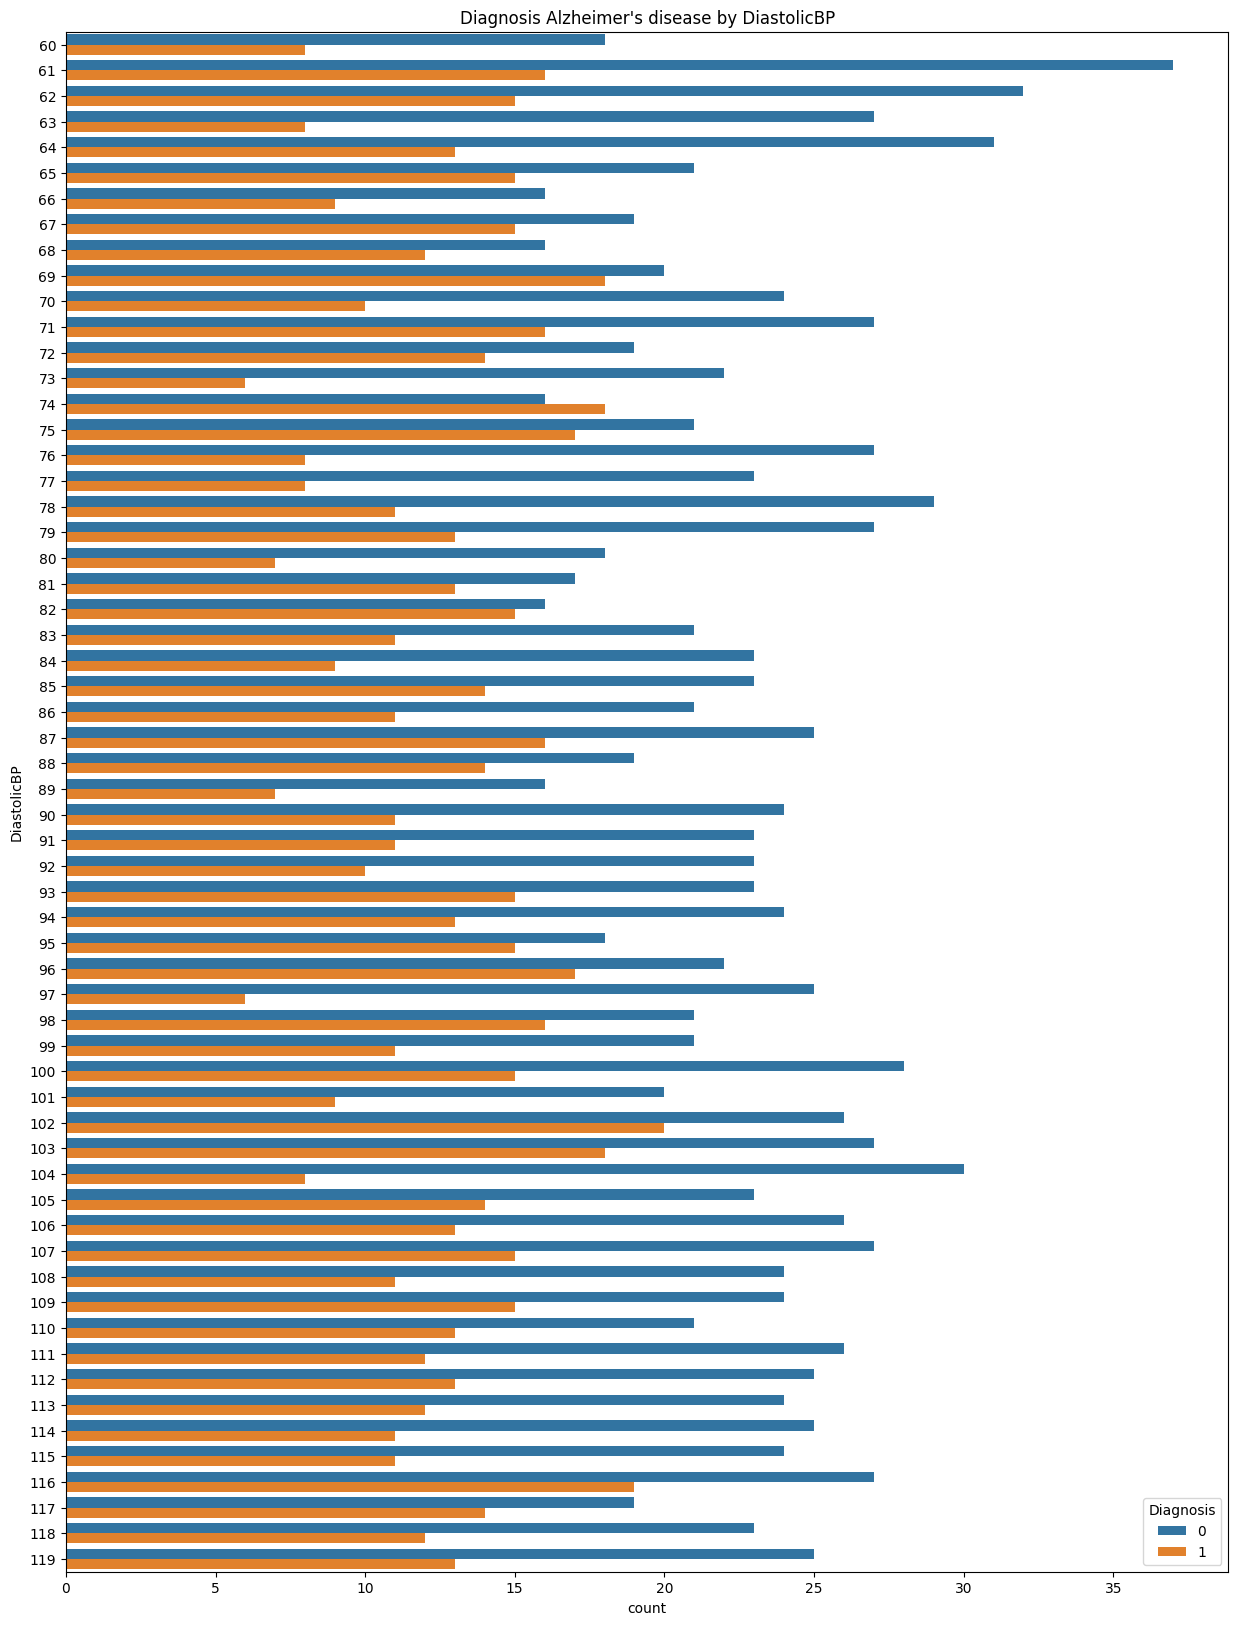

In [15]:
diastolic = df.groupby(['DiastolicBP', 'Diagnosis']).size().reset_index(name='count')

fig = plt.figure(figsize=(15, 20))
sns.barplot(x='count', y='DiastolicBP', hue='Diagnosis',data=diastolic, orient='h')
plt.title('Diagnosis Alzheimer\'s disease by DiastolicBP')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix ')

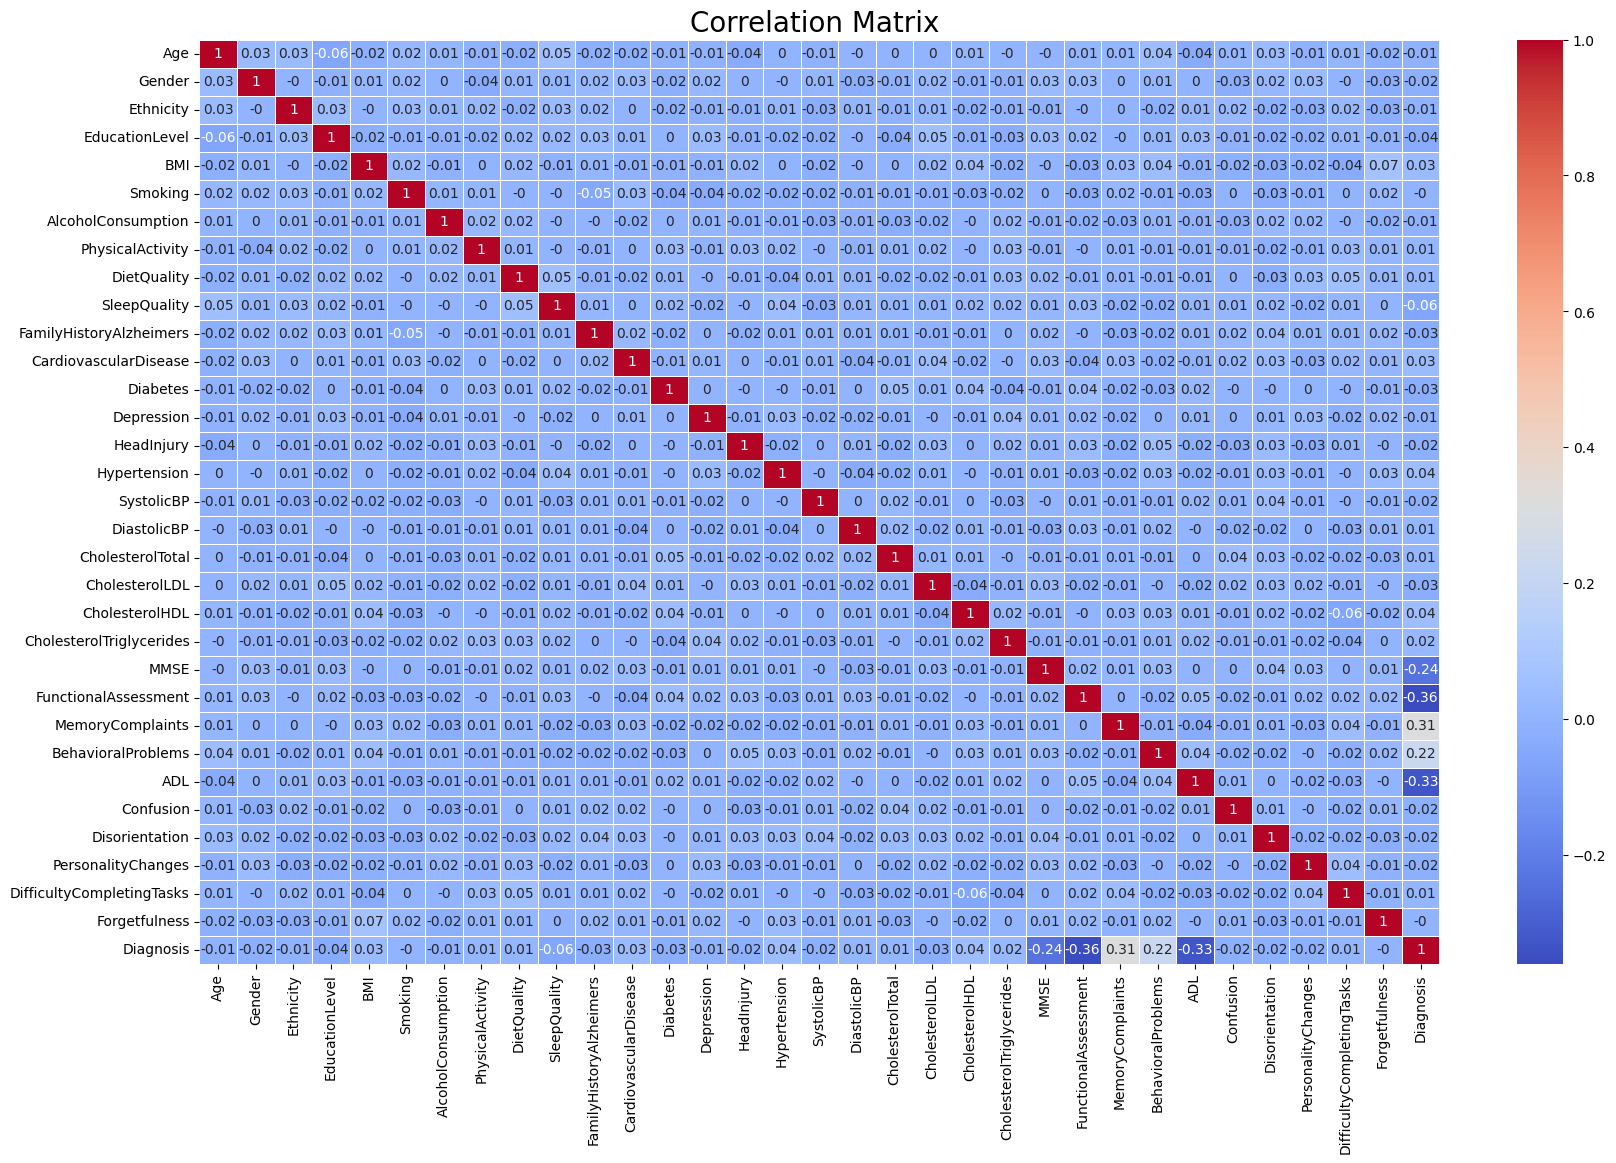

In [16]:
plt.figure(figsize=(20, 12))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)